Link to Tutorial: https://kwant-project.org/doc/1/tutorial/first_steps



Task: Computing the transmission probability through a two-dimensional quantum wire.

The Hamiltonian of a 2-dimensional quantum wire is defined as:
$$
H=\frac{-\hbar^2}{2 m}\left(\partial_x^2+\partial_y^2\right)+V(y)
$$

Subbing in the second-order differential operators in their bra-ket form in the limit a -> 0:
$$
H=\sum_{i, j}[(V(a i, a j)+4 t)|i, j\rangle\langle i, j|-t(|i+1, j\rangle\langle i, j|+| i, j\rangle\langle i+1, j|+| i, j+1\rangle\langle i, j|+| i, j\rangle\langle i, j+1|)]
$$

(refer to the tutorial for the maths)

The above Hamiltonian describes the energy values of the lattice site and it's neighbors. Ignoring the potential, $V$, we have a value of 4t for the on-site energy and a value of -t for the hopping energy from the current site to the neighboring sites.

The hopping is described as $t = \frac{\hbar^2}{2ma^2}$.

In [8]:
import kwant

from matplotlib import pyplot


In [31]:
def make_system(a = 1, t = 1.0, W= 10, L=30, L_well = 10):
    # Empty tight binding - hopping integral not defined yet.
    # Start with single square lattice
    lat = kwant.lattice.square(a)
    
    # set up kwant system
    syst = kwant.Builder()

    # define potential profile
    def potential(site, pot):
        (x, y) = site.pos
        if (L - L_well) / 2 < x < (L + L_well) / 2:
            return pot
        else:
            return 0
    
    def onsite(site, pot):
        return 4 * t + potential(site, pot)

    # set up on-site Hamiltonian
    syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite

    # set hopping for nearest neighbours
    syst[lat.neighbors()] = -t

    # create leads and attach them to the edges of the lattice structure
    lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
    lead[(lat(0, j) for j in range(W))] = 4*t
    lead[lat.neighbors()] = -t

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst

In [52]:
def plot_conductance(syst, welldepths):
    data = []
    energy = 0.2
    for welldepth in welldepths:
        smatrix = kwant.smatrix(syst, energy, params=dict(pot=-welldepth))
        data.append(smatrix.transmission(1, 0))

    pyplot.figure()
    pyplot.plot(welldepths, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [e^2/h]")
    pyplot.show()

In [53]:
def main():
    syst = make_system()

    kwant.plot(syst)
    
    # Finalise the tight binding system for transport calculations
    syst = syst.finalized()

    plot_conductance(syst=syst, welldepths= [0.01 * i for i in range(100)])



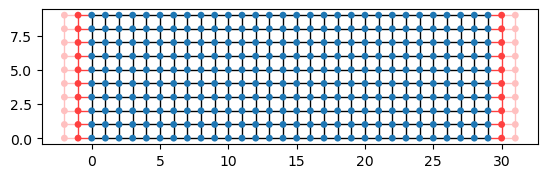

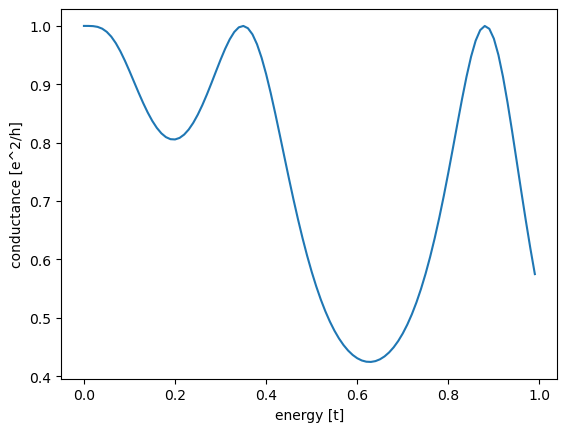

In [54]:
if __name__ == '__main__':
    main()

In the above plot, the main structure is shown in blue, the leads are shown in red (vanishing to infinity) and the hopping are shown by connections between each lattice sites.